# 时间序列分析
---

## 时间序列数据的回归分析

**时间序列过程(随机过程)**

一个标有时间脚标的随机变量序列被称为一个随机过程或时间序列过程。

<br>

**时间序列数据的特征**

- 按时间排列

- 时间序列的随机性

- 趋势、季节性、周期性、突变

### 有限分布滞后模型

**妇女生育决策的例子**

$$gfr_{t} = \alpha_{0} + \delta_{0}pe_{t} + \delta_{1}pe_{t-1} + \delta_{2}pe_{t-2} + \mu_{t}$$

其中$gfr_{t}$是生育率，$pe_{t}$是个人所得税减免的实际美元金额。

In [2]:
use http://fmwww.bc.edu/ec-p/data/wooldridge/fertil3

reg gfr pe ww2 pill




      Source |       SS           df       MS      Number of obs   =        72
-------------+----------------------------------   F(3, 68)        =     20.38
       Model |  13183.6215         3  4394.54049   Prob > F        =    0.0000
    Residual |  14664.2739        68  215.651087   R-squared       =    0.4734
-------------+----------------------------------   Adj R-squared   =    0.4502
       Total |  27847.8954        71  392.223879   Root MSE        =    14.685

------------------------------------------------------------------------------
         gfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          pe |     .08254   .0296462     2.78   0.007     .0233819    .1416981
         ww2 |   -24.2384   7.458253    -3.25   0.002    -39.12111   -9.355684
        pill |  -31.59403   4.081068    -7.74   0.000    -39.73768   -23.45039
       _cons |   98.68176   3.208129    30.76   

In [4]:
reg gfr pe ww2 pill pe_1 pe_2

test pe_1 pe_2



      Source |       SS           df       MS      Number of obs   =        70
-------------+----------------------------------   F(5, 64)        =     12.73
       Model |  12959.7886         5  2591.95772   Prob > F        =    0.0000
    Residual |  13032.6443        64  203.635067   R-squared       =    0.4986
-------------+----------------------------------   Adj R-squared   =    0.4594
       Total |  25992.4329        69  376.701926   Root MSE        =     14.27

------------------------------------------------------------------------------
         gfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          pe |   .0726718   .1255331     0.58   0.565    -.1781094     .323453
         ww2 |   -22.1265   10.73197    -2.06   0.043    -43.56608   -.6869196
        pill |  -31.30499   3.981559    -7.86   0.000    -39.25907   -23.35091
        pe_1 |  -.0057796   .1556629    -0.04   0

### 时间序列的高斯马尔科夫定理

- 假定TS.1 线性于参数

- 假定TS.2 无完全共线性

- 假定TS.3 零条件均值（严格外生性） $E(\mu_{t}|X)=0$

**例子**

$$mrdrte_{t}=\beta_{0}+\beta_{1} \text { polpc }_{t}+\mu_{t}$$

**无偏性**

在假定TS.1、TS.2和TS.3下，以$X$为条件，OLS估计量是无偏的。

<br>

- 假定TS.4 同方差性 $Var(\mu_{t}|X)=\sigma^{2}$

- 假定TS.5 无序列相关 $Corr(\mu_{t},\mu_{s}|X)=0,\forall t\neq s$

**OLS估计量的方差**

在时间序列高斯—马尔科夫假定TS.1到TS.5下，以$X$为条件，$\hat{\beta}_{j}$的条件方差为

$$\operatorname{Var}\left(\hat{\beta}_{j} | \mathbf{X}\right)=\sigma^{2} /\left[\operatorname{SST}_{j}\left(1-R_{j}^{2}\right)\right]$$

其中，$SST_{j}$是$x_{tj}$的总平方和，$R_{j}^{2}$为由$x_{j}$对所有其他自变量回归得到的$R^{2}$。

**$\sigma^{2}$的无偏估计**

在假定TS.1到TS.5下，估计量$\hat{\sigma}^{2}=SSR/df$是$\sigma^{2}$的一个无偏估计量，其中$df=n-k-1$。

<br>

**时间序列回归的高斯马尔科夫定理**

在假定TS.1到TS.5下，以$X$为条件，OLS估计量是最优线性无偏估计量。

<br>

- 假定TS.6 正态性

**正态抽样分布**

在时间序列的CLM假定TS.1到TS.6下，以$X$为条件，OLS估计量遵循正态分布。而且，在原假设下，单个$t$统计量服从$t$分布，$F$统计量服从$F$分布，通常构造的置信区间也是有效的。

<br>

**平稳随机过程**

对于随机过程${x_{t}:t=1,2,...}$，如果对于任意整数$h \geq 1$，$(x_{t_{1}},x_{t_{2}},...,x_{t_{m}})$的联合分布都与$(x_{t_{1}+h},x_{t_{2}+h},...,x_{t_{m}+h})$的联合分布相同，那么这个随机过程就是平稳的。

**协方差平稳过程**

对于一个具有有限二阶矩$[E(x_{t}^{2})<\infty]$的随机过程${x_{t}:t=1,2,...}$，若

- $E(x_{t})$为常数

- $Var(x_{t})$为常数

- 对任何$t$，$h\geq 1$，$Cov(x_{t},x_{t+h})$仅取决于h，而不取决于t。

那它就是协方差平稳的。

<br>

**弱相关时间序列**

对于一个平稳时间序列${x_{t}:t=1,2,...}$，若随着h无限增大，$x_{t}$和$x_{t+h}$“近乎独立”，则称为弱相关的。

<br>

修改的一组假定

- 假定TS.$1^{\prime}$ 线性与弱相关：除了增加平稳和弱相关之外，其余与假定TS.1完全相同

- 假定TS.$2^{\prime}$ 无完全共线性

- 假定TS.$3^{\prime}$ 零条件均值：同期外生性，$E(u_{t}|x_{t})=0$

**OLS的一致性**

在假定TS.$1^{\prime}$至TS.$3^{\prime}$成立时，OLS估计量是一致的。

<br>

- 假定TS.$4^{\prime}$ 同方差性：同期同方差的，$Var(u_{t}|x_{t})=\sigma^{2}$

- 假定TS.$5^{\prime}$ 无序列相关：$E(u_{t}u_{s}|x_{t},x_{s})=0$

**OLS的渐近正态性**

在假定TS.$1^{\prime}$至TS.$5^{\prime}$成立时，OLS估计量是渐近正态分布的。而且，通常的OLS标准误、t统计量、F统计量和LM统计量是渐近有效的。

## 时间序列回归中的序列相关

### 含序列相关误差时OLS的性质

- 当解释变量是严格外生，无论误差项中的序列相关程度如何，都是无偏的。

假设简单线性回归模型$y_{t}=\beta_{0}+\beta_{1} x_{t}+\mu_{t}$，OLS估计量$\hat{\beta}_{1}$可写成

$$\hat{\beta}_{1}=\beta_{1}+\operatorname{SST}_{x}^{-1} \sum_{t=1}^{n} x_{t} \mu_{t}$$

因此它的抽样方差为

$$\begin{aligned} \operatorname{Var}\left(\hat{\beta}_{1}\right) &=\operatorname{SST}_{x}^{-2} \operatorname{Var}\left(\sum_{t=1}^{n} x_{t} \mu_{t}\right) \\ &=\operatorname{SST}_{x}^{-2}\left(\sum_{t=1}^{n} x_{t}^{2} \operatorname{Var}\left(\mu_{t}\right)+2 \sum_{t=1}^{n-1} \sum_{j=1}^{n-t} x_{t} x_{t+j} \mathrm{E}\left(\mu_{t} \mu_{t+j}\right)\right) \\ &=\sigma^{2} / \mathrm{SST}_{x}+2\left(\sigma^{2} / \mathrm{SST}_{x}^{2}\right) \sum_{t=1}^{n-1} \sum_{j=1}^{n-t} \rho^{j} x_{t} x_{t+j} \end{aligned}$$

- 但通常的OLS标准误和检验统计量不再有效，而且连渐近有效都谈不上，OLS便不再是BLUE的。

**讨论**

“在出现滞后因变量和序列相关的误差时，OLS是不一致的。”这句话正确么？

假设

$$\begin{aligned} y_{t}=& \beta_{0}+\beta_{1} y_{t-1}+\mu_{t} \\ & \mathrm{E}\left(\mu_{t} | y_{t-1}\right)=0 \end{aligned}$$

因为$u_{t-1}=y_{t-1}-\beta_{0}-\beta_{1} y_{t-2}$，所以$\mu_{t}$和$\mu_{t-1}$之间的协方差就是$-\beta_{1} \operatorname{Cov}\left(u_{t}, y_{t-2}\right)$，它并不一定为零。

<br>

### 序列相关的检验

#### 回归元为严格外生时对$AR(1)$序列相关的$t$检验

检验步骤

(1) 做$y_{t}$对$x_{t 1}, \dots, x_{t k}$的OLS回归，得到OLS残差$\hat{\mu}_{t}$

(2) 做$\hat{\mu}_{t}$对$\hat{\mu}_{t-1}$的回归，得到$\hat{\mu}_{t-1}$的系数$\hat{\rho}$及其$t$统计量$t_{\hat{\rho}}$

(3) 按照通常的方法，用临界值或$p$值法拒绝（或不拒绝）原假设

<br>

#### 经典假定条件下的德宾-沃森检验

德宾-沃森（DW）统计量也是以OLS残差为基础的

$$DW=\frac{\sum_{t=2}^{n}\left(\hat{u}_{t}-\hat{u}_{t-1}\right)^{2}}{\sum_{t=1}^{n} \hat{u}_{t}^{2}}\approx 2(1-\hat{\rho})$$

它需要所有的经典线性模型假定，包括误差项的正态性。由于求DW的原分布比较困难，因而必须将DW与两组临界值进行比较，这些临界值通常被标志为$d_{U}$（上界）和$d_{L}$（下界）。它相对于$t$检验的唯一优点是可以列出一个精确的DW抽样分布。

<br>

#### 回归元不是严格外生时$AR(1)$序列相关的检验

一般回归元的序列相关检验

(1) 做$y_{t}$对$x_{t 1}, \dots, x_{t k}$的OLS回归，得到OLS残差$\hat{\mu}_{t}$

(2) 做$\hat{\mu}_{t}$对$x_{t 1}, \dots, x_{t k}, \hat{\mu}_{t-1}$的回归，得到$\hat{\mu}_{t-1}$的系数$\hat{\rho}$及其$t$统计量$t_{\hat{\rho}}$

(3) 按照通常的方法，用临界值或$p$值法拒绝（或不拒绝）原假设

<br>

#### 更高阶序列相关的检验

$AR(q)$序列相关的检验

(1) 做$y_{t}$对$x_{t 1}, \dots, x_{t k}$的OLS回归，得到OLS残差$\hat{\mu}_{t}$

(2) 做$\hat{\mu}_{t}$对$x_{t 1}, \dots, x_{t k}, \hat{\mu}_{t-1}, \hat{\mu}_{t-2}, \dots, \hat{\mu}_{t-q}$的回归

(3) 计算上式中$\hat{\mu}_{t-1}, \hat{\mu}_{t-2}, \dots, \hat{\mu}_{t-q}$联合显著的$F$检验

<br>

### 回归元严格外生时序列相关的修正

#### 有$AR(1)$误差的可行GLS估计

考虑只有一个解释变量的情况

$$y_{t}=\beta_{0} + \beta_{1}x_{t} + \mu_{t}$$

假定误差服从AR(1)模型，即

$$\mu_{t} = \rho \mu_{t-1} + e_{t}$$

可以进行如下方程变换

$$y_{t}-\rho y_{t-1}=(1-\rho) \beta_{0}+\beta_{1}\left(x_{t}-\rho x_{t-1}\right)+e_{t}, t \geq 2$$

上式可以写为

$$\widetilde{y}_{t}=(1-\rho) \beta_{0}+\beta_{1} \widetilde{x}_{t}+e_{r}, t \geq 2$$

其中

$$\tilde{y}_{t}=y_{t}-\rho y_{t-1}, \widetilde{x}_{t}=x_{t}-\rho x_{t-1}$$

被称为**准差分数据**。由于它们没有利用第一时期的数据，因此OLS估计量还不完全是BLUE的。可以把$t=1$时的方程表示为

$$y_{1}=\beta_{0}+\beta_{1} x_{1}+u_{1}$$

把方程两边都乘以$\left(1-\rho^{2}\right)^{1 / 2}$，以使误差具有相同的方差

$$\left(1-\rho^{2}\right)^{1 / 2} y_{1}=\left(1-\rho^{2}\right)^{1 / 2} \beta_{0}+\beta_{1}\left(1-\rho^{2}\right)^{1 / 2} x_{1}+\left(1-\rho^{2}\right)^{1 / 2} u_{1}$$

然后把上述方程和之前的准除差分方程一起用于OLS回归，就可以得到BLUE估计量。这里的GLS估计量存在的问题是，实际中我们很少知道$\rho$。但我们已经可以得到它的一个一致估计量：只要将OLS残差对其滞后值回归即可。

**AR(1)模型的可行GLS估计**

(1) 做$y_{t}$对$x_{t 1}, \dots, x_{t k}$的OLS回归，得到OLS残差$\hat{\mu}_{t}$

(2) 做$\hat{\mu}_{t}$对$\hat{\mu}_{t-1}$的回归，得到$\hat{\mu}_{t-1}$的系数$\hat{\rho}$

(3) 用OLS估计方程

$$\widetilde{y}_{t}=\beta_{0} \widetilde{x}_{t 0}+\beta_{1} \widetilde{x}_{t 1}+\ldots+\beta_{k} \widetilde{x}_{t k}+\text {error }_{t}$$

其中，对$t \geq 2$，$\widetilde{x}_{t 0}=(1-\hat{\rho})$，而$\widetilde{x}_{10}=\left(1-\hat{\rho}^{2}\right)^{1 / 2}$。常见的标准误、$t$统计量和$F$统计量都是渐近有效的。

$AR(1)$模型的FGLS估计有很多名称，根据处理第一次观测的方法不同而不同。柯克伦-奥卡特（CO）估计省略了第一次观测，而普莱斯-温斯顿（PW）估计按照上述方法使用了第一次观测。

<br>

#### 在OLS后的序列相关-稳健推断

## 平稳自回归移动平均过程 —— ARMA模型

### 移动平均过程

#### 一阶移动平均过程MA(1)

考虑过程

$$Y_{t}=\mu+\varepsilon_{t}+\theta \varepsilon_{t-1}$$

其中，${\varepsilon_{t}:t=0,1,...}$是均值为$0$和方差为$\sigma_{e}^{2}$的独立同分布序列（白噪声）。因此其期望为

$$E\left(Y_{t}\right)=E\left(\mu+\varepsilon_{t}+\theta \varepsilon_{t-1}\right)=\mu+E\left(\varepsilon_{t}\right)+\theta \cdot E\left(\varepsilon_{t-1}\right)=\mu$$

它的方差是

$$\begin{aligned} E\left(Y_{t}-\mu\right)^{2} &=E\left(\varepsilon_{t}+\theta \varepsilon_{t-1}\right)^{2} \\ &=E\left(\varepsilon_{t}^{2}+2 \theta \varepsilon_{t} \varepsilon_{t-1}+\theta^{2} \varepsilon_{t-1}^{2}\right) \\ &=\sigma^{2}+0+\theta^{2} \sigma^{2} \\ &=\left(1+\theta^{2}\right) \sigma^{2} \end{aligned}$$

一阶自协方差是

$$\begin{aligned} E\left(Y_{t}-\mu\right)\left(Y_{t-1}-\mu\right) &=E\left(\varepsilon_{t}+\theta \varepsilon_{t-1}\right)\left(\varepsilon_{t-1}+\theta \varepsilon_{t-2}\right) \\ &=E\left(\varepsilon_{t} \varepsilon_{t-1}+\theta \varepsilon_{t-1}^{2}+\theta \varepsilon_{t} \varepsilon_{t-2}+\theta^{2} \varepsilon_{t-1} \varepsilon_{t-2}\right) \\ &=0+\theta \sigma^{2}+0+0 = \theta \sigma^{2} \end{aligned}$$

高阶自协方差均为$0$

$$E\left(Y_{t}-\mu\right)\left(Y_{t-j}-\mu\right)=E\left(\varepsilon_{t}+\theta \varepsilon_{t-1}\right)\left(\varepsilon_{t-j}+\theta \varepsilon_{t-j-1}\right)=0, j>1$$

协方差平稳过程的第$j$个自相关系数（记为$\rho_{j}$）定义为它的第$j$个自协方差除以它的方差

$$\rho_{j} \equiv \gamma_{j} / \gamma_{0}$$

因此，一个$MA(1)$过程的一阶自相关系数可以由下式得到

$$\rho_{1}=\frac{\theta \sigma^{2}}{\left(1+\theta^{2}\right) \sigma^{2}}=\frac{\theta}{\left(1+\theta^{2}\right)}$$

高阶自相关系数均为$0$。

例如$$Y_{t}=10+\varepsilon_{t}+0.7 \varepsilon_{t-1}$$，则一阶自相关系数为

$$\rho_{1}=\frac{0.7}{1+0.7^{2}}=0.4698$$

高阶为0。

<br>

#### $q$阶移动平均过程

一个$q$阶移动平均过程，记为$MA(q)$，形式如下

$$Y_{t}=\mu+\varepsilon_{t}+\theta_{1} \varepsilon_{t-1}+\theta_{2} \varepsilon_{t-2}+\cdots+\theta_{q} \varepsilon_{t-q}$$

它的期望是

$$E\left(Y_{t}\right)=\mu+E\left(\varepsilon_{t}\right)+\theta_{1} \cdot E\left(\varepsilon_{t-1}\right)+\theta_{2} \cdot E\left(\varepsilon_{t-2}\right)+\cdots+\theta_{q} \cdot E\left(\varepsilon_{t-q}\right)=\mu$$

方差为

$$\gamma_{0}=\sigma^{2}+\theta_{1}^{2} \sigma^{2}+\theta_{2}^{2} \sigma^{2}+\cdots+\theta_{q}^{2} \sigma^{2}=\left(1+\theta_{1}^{2}+\theta_{2}^{2}+\cdots+\theta_{q}^{2}\right) \sigma^{2}$$

自协方差为

$$\gamma_{j}=\left\{\begin{array}{ll}{\left[\theta_{j}+\theta_{j+1} \theta_{1}+\theta_{j+2} \theta_{2}+\cdots+\theta_{q} \theta_{q-j}\right] \cdot \sigma^{2},} & {j=1,2, \cdots, q} \\ {0,} & {j>q}\end{array}\right.$$

### 自回归过程

#### 一阶自回归过程

一个一阶自回归，记为$AR(1)$，其形式为

$$Y_{t}=c+\phi Y_{t-1}+\varepsilon_{t}$$

当$|\phi|<1$时，它是一个协方差平稳过程。事实上，它等价于一个$MA(\infty)$过程

$$\begin{aligned} Y_{t} &=\left(c+\varepsilon_{t}\right)+\phi \cdot\left(c+\varepsilon_{t-1}\right)+\phi^{2} \cdot\left(c+\varepsilon_{t-2}\right)+\phi^{3} \cdot\left(c+\varepsilon_{t-3}\right)+\cdots \\ &=[c /(1-\phi)]+\varepsilon_{t}+\phi \varepsilon_{t-1}+\phi^{2} \varepsilon_{t-2}+\phi^{3} \varepsilon_{t-3}+\cdots \end{aligned}$$

因此，$AR(1)$平稳过程的均值为

$$E\left(Y_{t}\right)=\mu=[c /(1-\phi)]$$

其方差为

$$\begin{aligned} \gamma_{0} &=E\left(Y_{t}-\mu\right)^{2} \\ &=E\left(\varepsilon_{t}+\phi \varepsilon_{t-1}+\phi^{2} \varepsilon_{t-2}+\phi^{3} \varepsilon_{t-3}+\cdots\right)^{2} \\ &=\left(1+\phi^{2}+\phi^{4}+\phi^{6}+\cdots \cdot\right) \cdot \sigma^{2} \\ &=\sigma^{2} /\left(1-\phi^{2}\right) \end{aligned}$$

其中，第$j$个自协方差为

$$\begin{aligned} \gamma_{j} &=E\left(Y_{t}-\mu\right)\left(Y_{t-j}-\mu\right) \\ &=E\left[\varepsilon_{t}+\phi \varepsilon_{t-1}+\phi^{2} \varepsilon_{t-2}+\cdots+\phi^{j} \varepsilon_{t-j}+\phi^{j+1} \varepsilon_{t-j-1}+\phi^{j+2} \varepsilon_{t-j-2}+\cdots\right] \\ & \times\left[\varepsilon_{t-j}+\phi \varepsilon_{t-j-1}+\phi^{2} \varepsilon_{t-j-2}+\cdots\right] \\ &=\left[\phi^{j}+\phi^{j+2}+\phi^{j+4}+\cdots\right] \cdot \sigma^{2} \\ &=\phi^{j}\left[1+\phi^{2}+\phi^{4}+\cdots\right] \cdot \sigma^{2} \\ &=\left[\phi^{j} /\left(1-\phi^{2}\right)\right] \cdot \sigma^{2} \end{aligned}$$

则自相关系数函数为

$$\rho_{j}=\gamma_{j} / \gamma_{0}=\phi^{j}$$

事实上，如果假定过程是协方差平稳的，可以直接计算得到其期望、方差、自协方差和自相关系数。

如果对$AR(1)$过程两边取期望，得到

$$E\left(Y_{t}\right)=c+\phi \cdot E\left(Y_{t-1}\right)+E\left(\varepsilon_{t}\right)$$

由于$E\left(Y_{t}\right)=E\left(Y_{t-1}\right)=\mu$，可得

$$\mu=c /(1-\phi)$$

用类似的方法求$Y_{t}$的二阶矩，$AR(1)$过程可改写为

$$\left(Y_{t}-\mu\right)=\phi\left(Y_{t-1}-\mu\right)+\varepsilon_{t}$$

将等式两边平方并取期望，得到

$$E\left(Y_{t}-\mu\right)^{2}=\phi^{2} E\left(Y_{t-1}-\mu\right)^{2}+2 \phi E\left[\left(Y_{t-1}-\mu\right) \varepsilon_{t}\right]+E\left(\varepsilon_{t}^{2}\right)$$

由于$E\left(Y_{t}-\mu\right)^{2}=E\left(Y_{t-1}-\mu\right)^{2}=\gamma_{0}$，得到

$$\gamma_{0}=\sigma^{2} /\left(1-\phi^{2}\right)$$

类似地，我们也可以在两边同时乘以$\left(Y_{t-j}-\mu\right)$，然后取期望

$$E\left[\left(Y_{t}-\mu\right)\left(Y_{t-j}-\mu\right)\right]=\phi \cdot E\left[\left(Y_{t-1}-\mu\right)\left(Y_{t-j}-\mu\right)\right]+E\left[\varepsilon_{t}\left(Y_{t-j}-\mu\right)\right]$$

当$j>0$时，上式可变为

$$\gamma_{j}=\phi \gamma_{j-1}$$

因此，递推可得

$$\gamma_{j}=\phi^{j} \gamma_{0}$$

<br>

#### 滞后算子

假设我们从$\left\{x_{t}\right\}_{t=-\infty}^{\infty}$开始，生成一个新的序列$\left\{y_{t}\right\}_{t=-\infty}^{\infty}$，该序列在每一个时间$t$上所对应的$y$的取值都是在时间$t-1$上对应的$x$的取值

$$y_{t}=x_{t-1}$$

这就是$\left\{x_{t}\right\}_{t=-\infty}^{\infty}$的滞后算子，这个算子可以用符号$L$简记为

$$L x_{t} \equiv x_{t-1}$$

进行两次滞后运算为$L^{2} x_{t}=x_{t-2}$。一般地，对于任意的整数$k$，

$$L^{k} x_{t}=x_{t-k}$$

<br>

#### 一阶差分方程

对于一阶差分方程

$$y_{t}=\phi y_{t-1}+w_{t}$$

用滞后算子可以改写为

$$y_{t}=\phi L y_{t}+w_{t}$$

即

$$(1-\phi L) y_{t}=w_{t}$$

考虑在上式两边同时乘以下面这个算子

$$\left(1+\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots+\phi^{i} L^{t}\right)$$

其结果为

$$\begin{aligned}\left(1+\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots+\phi^{t} L^{t}\right)(1-\phi L) y_{t} & \\=\left(1+\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots+\phi^{t} L^{t}\right) w_{t} \end{aligned}$$

将左边的复合算子展开，可得

$$\begin{array}{l}
\left(1+\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots+\phi^{i} L^{t}\right)(1-\phi L) \\
\quad=\left(1+\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots+\phi^{\prime} L^{t}\right) \\
\quad-\left(1+\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots \cdots+\phi^{t} L^{t}\right) \phi L \\
=\left(1+\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots+\phi^{t} L^{t}\right) \\
\quad-\left(\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots+\phi^{t} L^{t}+\phi^{t+1} L^{t+1}\right) \\
=\left(1-\phi^{t+1} L^{t+1}\right)
\end{array}$$

将其代入原式，得到

$$\left(1-\phi^{t+1} L^{t+1}\right) y_{t}=\left(1+\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots+\phi^{t} L^{t}\right) w_{t}$$

如果$|\phi|<1$且$y_{-1}$是一个有限的书，那么$\phi^{t+1} y-1$会随着$t$的增大而减少，当$t$足够大时，有

$$\left(1+\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots+\phi^{t} L^{t}\right)(1-\phi L) y_{t} \cong y_{t}$$

即

$$(1-\phi L)^{-1}=\lim _{j \rightarrow \infty}\left(1+\phi L+\phi^{2} L^{2}+\phi^{3} L^{3}+\cdots+\phi^{j} L^{j}\right)$$

因此，假设$|\phi|<1$，相当于原式两边同时“除以”$(1-\phi L)$，得到

$$y_{t}=(1-\phi L)^{-1} w_{t}$$

或者

$$y_{t}=w_{t}+\phi w_{t-1}+\phi^{2} w_{t-2}+\phi^{3} w_{t-3}+\cdots$$

<br>

#### 二阶差分方程

考虑下面的一个二阶差分方程

$$y_{t}=\phi_{1} y_{t-1}+\phi_{2} y_{t-2}+w_{t}$$

将其改写为滞后方程，得到

$$\left(1-\phi_{1} L-\phi_{2} L^{2}\right) y_{t}=w_{t}$$

假设我们可以对滞后算子的二阶多项式进行因式分解，如下所示

$$\left(1-\phi_{1} L-\phi_{2} L^{2}\right)=\left(1-\lambda_{1} L\right)\left(1-\lambda_{2} L\right)=\left(1-\left[\lambda_{1}+\lambda_{2}\right] L+\lambda_{1} \lambda_{2} L^{2}\right)$$

例如，如果$\phi_{1}=0.6$，$\phi_{2}=-0.08$，那么分解如下

$$\left(1-0.6 L+0.08 L^{2}\right)=(1-0.4 L)(1-0.2 L)$$

考虑下面关于标量$z$的方程，有

$$\left(1-\phi_{1} z-\phi_{2} z^{2}\right)=\left(1-\lambda_{1} z\right)\left(1-\lambda_{2} z\right)$$

对于二次方程$\left(1-\phi_{1} z-\phi_{2} z^{2}\right)=0$，可以由下式来求

$$z_{1}=\frac{\phi_{1}-\sqrt{\phi_{1}^{2}+4 \phi_{2}}}{-2 \phi_{2}}$$

$$z_{2}=\frac{\phi_{1}+\sqrt{\phi_{1}^{2}+4 \phi_{2}}}{-2 \phi_{2}}$$

然后根据

$$\lambda_{1}^{-1}=z_{1}$$

$$\lambda_{2}^{-1}=z_{2}$$

得到$\lambda_{1}$和$\lambda_{2}$。例如前面那个例子中，可以计算出

$$\begin{array}{l}
z_{1}=\frac{0.6-\sqrt{(0.6)^{2}-4(0.08)}}{2(0.08)}=2.5 \\
z_{2}=\frac{0.6+\sqrt{(0.6)^{2}-4(0.08)}}{2(0.08)}=5.0
\end{array}$$

则

$$\begin{array}{l}
\lambda_{1}=1 /(2.5)=0.4 \\
\lambda_{2}=1 /(5.0)=0.2
\end{array}$$

如果所有的$\lambda$的绝对值小于1，则是稳定的，否则是发散的。

<br>

#### 二阶自回归过程

一个二阶自回归过程，记做$AR(2)$，满足下式

$$Y_{t}=c+\phi_{1} Y_{t-1}+\phi_{2} Y_{t-2}+\varepsilon_{t}$$

写成滞后算子的形式为

$$\left(1-\phi_{1} L-\phi_{2} L^{2}\right) Y_{t}=c+\varepsilon_{t}$$

则稳定的条件是

$$\left(1-\phi_{1} z-\phi_{2} z^{2}\right)=0$$

这个方程的根落在单位圆之外，当此条件满足时，$AR(2)$过程是协方差平稳的。

<br>

#### $p$阶自回归过程

一个$p$阶自回归过程，记做$AR(p)$，满足下式

$$Y_{t}=c+\phi_{1} Y_{t-1}+\phi_{2} Y_{t-2}+\cdots+\phi_{p} Y_{t-p}+\varepsilon_{t}$$

<br>

#### 混合自回归移动平均过程

一个$ARMA(p,q)$过程包括自回归和移动平均项：

$$Y_{t}=c+\phi_{1} Y_{t-1}+\phi_{2} Y_{t-2}+\cdots+\phi_{p} Y_{t-p}+\varepsilon_{t}+\theta_{1} \varepsilon_{t-1}+\theta_{2} \varepsilon_{t-2}+\cdots+\theta_{\alpha} \varepsilon_{t-q}$$

或以滞后算子的形式表示如下

$$\left(1-\phi_{1} L-\phi_{2} L^{2}-\cdots-\phi_{p} L^{p}\right) Y_{t}=c+\left(1+\theta_{1} L+\theta_{2} L^{2}+\cdots+\theta_{q} L^{q}\right) \varepsilon_{t}$$

$ARMA$过程的平稳性完全取决于自回归参数，而于移动平均参数无关。

### AR和MA过程的识别

#### 自相关函数（Autocorrelation Function，ACF）

自相关函数（系数）类比于相关系数，若时间序列是平稳的，则对于$x_{t}$和$x_{t-h}$的自相关函数为

$$\frac{\operatorname{Covariance}\left(x_{t}, x_{t-h}\right)}{\text { Std.Dev. }\left(x_{t}\right) \operatorname{Std} . \text { Dev. }\left(x_{t-h}\right)}=\frac{\text { Covariance }\left(x_{t}, x_{t-h}\right)}{\text { Variance }\left(x_{t}\right)}$$

#### 偏自相关函数（PACF）

偏自相关函数是条件相关。例如，考虑一个回归，其中$y$是因变量，$x_{1}$、$x_{2}$和$x_{3}$是自变量，则$y$和$x_{3}$的偏相关性需要控制$x_{2}$和$x_{3}$，数学表达为

$$\frac{\text { Covariance }\left(y, x_{3} | x_{1}, x_{2}\right)}{\sqrt{\operatorname{Variance}\left(y | x_{1}, x_{2}\right) \operatorname{Variance}\left(x_{3} | x_{1}, x_{2}\right)}}$$

可类比于下面的第二个回归模型

$$y=\beta_{0}+\beta_{1} x^{2}$$

$$y=\beta_{0}+\beta_{1} x+\beta_{2} x^{2}$$

因此，对于一个时间序列，$x_{t}$和$x_{t-h}$的偏相关函数需要控制期间的所有观测点。

- 一阶偏自相关函数等于一阶自相关函数

- 二阶偏自相关函数为

$$\frac{\text { Covariance }\left(x_{t}, x_{t-2} | x_{t-1}\right)}{\sqrt{\operatorname{Variance}\left(x_{t} | x_{t-1}\right) \operatorname{Variance}\left(x_{t-2} | x_{t-1}\right)}}$$

- 三阶偏自相关函数为

$$\frac{\text { Covariance }\left(x_{i}, x_{i-3} | x_{i-1}, x_{i-2}\right)}{\sqrt{\operatorname{Variance}\left(x_{t} | x_{t-1}, x_{t-2}\right) \operatorname{Variance}\left(x_{t-3} | x_{t-1}, x_{t-2}\right)}}$$

以此类推

<br>

**AR(1)**过程

在$AR(1)$过程中，即使$y_{t-2}$没有直接出现在模型中，但是$y_{t-2}$也是与$y_{t}$相关的。$y_{t}$和$y_{t-2}$的自相关系数（即$\rho_{2}$）等于$y_{t}$和$y_{t-1}$的自相关系数（即$\rho_{1}$）乘以$y_{t-1}$和$y_{t-2}$的自相关系数（仍为$\rho_{1}$），所以，$\rho_{2}=\left(\rho_{1}\right)^{2}$。相反，$y_{t}$和$y_{t-s}$的偏自相关则剔除了插入值$y_{t-1}$到$y_{t-s+1}$间的影响。因此，在$AR(1)$过程中，$y_{t}$和$y_{t-2}$间的偏自相关系数等于$0$。而$MA(1)$过程的PACF不会截尾为$0$，相反表现出衰减形式。

**各种过程的ACF和PACF**

<div align=center>
<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/mXuBNyL9/w009.jpg?v=57e6ad06682ebf72d1488738b2546665" width = "52%" />
</div>

<div align=center>
<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/qGud4Ney/w010.jpg?v=9afdab4fce78ccc04a0f1f167b16905f" width = "50%" />
</div>

<br>

> 若有季节性

<div align=center>
<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/WnuG9ENQ/001.png?v=d945aa6d0f1ecdebfcf74bb32d2851e4" width = "40%" />
</div>

<div align=center>
<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/p9u7y57N/002.png?v=d0cd7c218061fd3d8a262eda3a82fb20" width = "60%" />
</div>

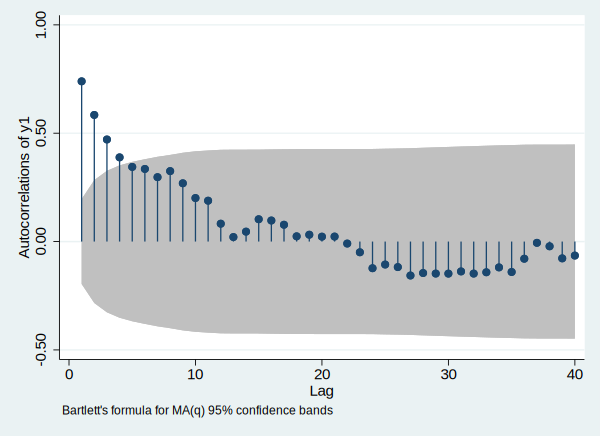

In [1]:
use "https://p193.p3.n0.cdn.getcloudapp.com/items/z8ux9Ywz/sim_2.dta?v=d02c6ee4a1fa865f62ff0ab01aaa565c", clear

ac y1

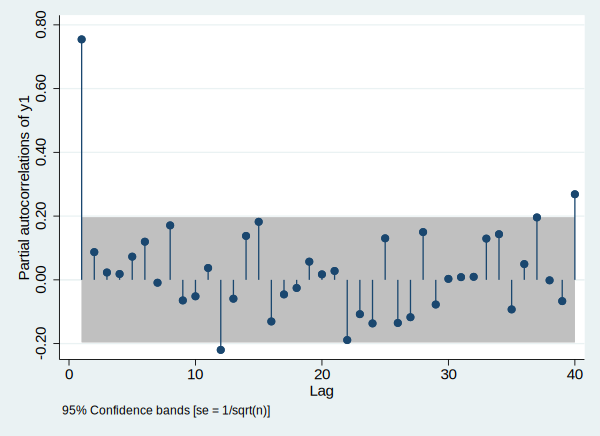

In [2]:
pac y1

In [3]:
eststo clear
eststo: quietly arima y1, ar(1)
eststo: quietly arima y1, ar(1) ma(12)
esttab, se aic bic



(est1 stored)

(est2 stored)


--------------------------------------------
                      (1)             (2)   
                       y1              y1   
--------------------------------------------
y1                                          
_cons              -0.481          -0.499   
                  (0.369)         (0.354)   
--------------------------------------------
ARMA                                        
L.ar                0.753***        0.756***
                 (0.0718)        (0.0701)   

L12.ma                            -0.0585   
                                  (0.104)   
--------------------------------------------
sigma                                       
_cons               0.917***        0.916***
                 (0.0627)        (0.0676)   
--------------------------------------------
N                     100             100   
AIC                 273.3           275.1   
BIC                 281.1           285.5   
---------------------

## 非平稳时间序列建模

**高度持续性时间序列——随机游走过程**

$$y_{t}=y_{t-1}+\varepsilon_{t},t=1,2...$$

若假定$y_{0}=0$，则$E(y_{t})=0$

$$Var(y_{t})=\sigma^{2}t$$

$$E(y_{t+h}|y_{t})=y_{t}$$

$$Corr(y_{t},y_{t+h})=\sqrt{t/(t+h)}$$

随机游走是所谓单位根过程的一个特例。

**零阶单整I(0)**

弱相关平稳过程被称为零阶单整或I(0)。

**一阶单整I(1)**

单位根过程，例如随机游走被称为一阶单整或I(1)。这意味着这个过程的一阶差分便是弱相关平稳的。I(1)时间序列常被称为差分平稳过程。

<br>

### 单位根检验

#### 伪回归（spurious regression）

点击[此处](http://tylervigen.com/spurious-correlations)，查看一个有趣的说明。

Granger和Newbold（1974）年发现，对于两类独立的随机游走序列进行回归，回归结果的判定系数$R^{2}$通常很大，$t$统计量也是显著的，但得到的结果却没有任何经济意义。




        time variable:  time, 1 to 700
                delta:  1 unit


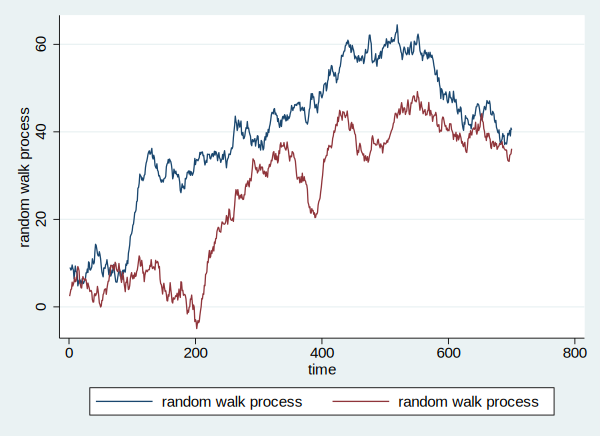

In [4]:
use "https://p193.p3.n0.cdn.getcloudapp.com/items/d5uvQEvB/spurious.dta?v=c0ae9f2c8e324305f4a500241aa8a52b", clear
gen time = _n
tsset time

tsline rw1 rw2, name(g1, replace)

In [5]:
regress rw1 rw2


      Source |       SS           df       MS      Number of obs   =       700
-------------+----------------------------------   F(1, 698)       =   1667.65
       Model |  122116.557         1  122116.557   Prob > F        =    0.0000
    Residual |  51112.3314       698  73.2268359   R-squared       =    0.7049
-------------+----------------------------------   Adj R-squared   =    0.7045
       Total |  173228.888       699  247.823874   Root MSE        =    8.5573

------------------------------------------------------------------------------
         rw1 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         rw2 |   .8420412   .0206196    40.84   0.000     .8015572    .8825251
       _cons |   17.81804   .6204776    28.72   0.000     16.59981    19.03627
------------------------------------------------------------------------------


#### DF和ADF检验

检验单位根的一种最简单方法是从AR(1)模型开始

$$y_{t}=\alpha + \rho y_{t-1} + e_{t}, t = 1,2,...$$

原假设为

$$H_{0}:\rho = 1$$

将原方程两边同时减去$y_{t-1}$，并设$\gamma = \rho - 1$，得到

$$\Delta y_{t} = \alpha + \gamma y_{t-1} + e_{t}$$

这是一个动态的完整模型。t统计量下在$H_{0}$下的渐近分布被称为DF分布。

事实上，Dickey和Fuller（1979）考察了用于检验单位根的三个不同的回归方程式

$$\Delta y_{t}=\gamma_{y_{t-1}}+\varepsilon_{t} \quad (1)$$

$$\Delta y_{t}=a_{0}+\gamma y_{t-1}+\varepsilon_{t} \quad (2)$$

$$\Delta y_{t}=a_{0}+\gamma y_{t-1}+a_{2} t+\varepsilon_{t} \quad (3)$$

<div align=center>
<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/xQuWkLye/w011.jpg?v=47b30f6b8630aacd67c75850b4ee7b44" width = "70%" />
</div>

根据$F$统计量的构造方式，可以得到

$$\phi_{i}=\frac{[\text { SSR (restricted })-\text { SSR(unrestricted } ) ] / r}{\text { SSR(unrestricted } ) /(T-k)}$$

<br>

更一般的，我们可以在方程中加进$\Delta y_{t}$的p期滞后，以表示这个过程的动态。单位根检验的原假设都十分相似：将$\Delta y_{t}$对$y_{t-1},\Delta y_{t-1},...,\Delta y_{t-p}$回归。方法和从前一样，DF检验的这个广义形式常常被称为增广迪基-富勒(ADF)检验。可以用如下方程表示。

$$\Delta y_{t}=\gamma y_{t-1}+\sum_{i=2}^{p} \beta_{i} \Delta y_{t-i+1}+\varepsilon_{i}$$

$$\Delta y_{t}=a_{0}+\gamma y_{t-1}+\sum_{i=2}^{p} \beta_{i} \Delta y_{t_{t}+i+1}+\varepsilon_{t}$$

$$\Delta y_{t}=a_{0}+\gamma y_{t-1} +a_{2} t+\sum_{i=2}^{p} \beta_{i} \Delta y_{t_{t}+i+1}+\varepsilon_{t}$$

确定性变量的确定步骤，可点击[此处](https://p193.p3.n0.cdn.getcloudapp.com/items/wbu0de2d/Determination%20of%20the%20Deterministic%20Regressors.pdf?v=96a069427d0fec2b612dfe521d566624)查看。

<br>

**基本建议**

在把I(1)变量用于线性回归模型之前，无论是用OLS还是用工具变量法估计它们，都应该先进行差分，这是个稳妥的方法。而且在格兰杰-纽博尔德关于伪回归的经典论文发表之后，许多时间序列回归都采用这种方法。

### 协整

#### 协整

如果${y_{t}:t=0,1,...}$和${x_{t}:t=0,1,...}$是两个I(1)过程，如果对某些$\beta \neq 0$值来说，$y_{t}-\beta x_{t}$ 有可能是一个I(0)过程。若存在这样的$\beta$，我们就说y和x是协整的，并称$\beta$为协整参数。

Engle和Granger（1987）提出如下的协整定义：

如果

（1）向量$x_{t}=\left(x_{1 t}, x_{2 t}, \ldots, x_{m}\right)^{\prime}$的所有序列都是$d$阶单整；

（2）存在一个向量$\beta=\left(\beta_{1}, \beta_{2}, \cdots, \beta_{n}\right)$，使得线性组合$\beta x_{t}=\beta_{1} x_{1 t}+\beta_{2} x_{2 t}+\cdots+\beta_{n} x_{m}$是$(d-b)$阶单整，其中$b>0$

则向量$x_{t}=\left(x_{1 t}, x_{2 t}, \ldots, x_{m}\right)^{\prime}$是$d$、$b$阶单整，向量$\beta$称为协整向量。

<br>

#### 协整检验：Engle-Granger检验方法

Engle和Granger（1987）指出：确定两个$I(1)$变量是否协整需要4步过程：

（1）确认变量的单整阶数

（2）估计长期均衡关系，即用公式$y_{t}=\beta_{0}+\beta_{1} x_{t}+e_{t}$进行OLS估计，得到残差序列$\left\{\hat{e}_{t}\right\}$

（3）考察残差的自回归模型$\Delta \hat{e}_{t}=a_{1} \hat{e}_{t-1}+\varepsilon_{t}$，如果不能拒绝零假设，则判定序列还有一个单位根，则两个变量不是协整的；否则，零假设的拒绝就意味着残差序列是平稳的，判定协整关系。

In [6]:
use "https://p193.p3.n0.cdn.getcloudapp.com/items/geuWDz4Z/usa.dta?v=ed4b5e9dfb252201a4ac92f8e8f41108", clear

In [7]:
gen date = q(1984q1) + _n - 1
format %tq date
tsset date

* Augmented Dickey Fuller Regressions
regress D.f L.f L.D.f
regress D.b L.b L.D.b




        time variable:  date, 1984q1 to 2009q4
                delta:  1 quarter


      Source |       SS           df       MS      Number of obs   =       102
-------------+----------------------------------   F(2, 99)        =     25.45
       Model |  10.0957158         2   5.0478579   Prob > F        =    0.0000
    Residual |  19.6353195        99  .198336561   R-squared       =    0.3396
-------------+----------------------------------   Adj R-squared   =    0.3262
       Total |  29.7310353       101  .294366686   Root MSE        =    .44535

------------------------------------------------------------------------------
         D.f |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           f |
         L1. |  -.0446213   .0178142    -2.50   0.014    -.0799685   -.0092741
         LD. |   .5610582   .0809827     6.93   0.000     .4003708    .7217455
             |
       _cons |

In [8]:
* Augmented Dickey Fuller Regressions with built in functions
dfuller f, regress lags(1)
dfuller b, regress lags(1)



Augmented Dickey-Fuller test for unit root         Number of obs   =       102

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -2.505            -3.509            -2.890            -2.580
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.1143

------------------------------------------------------------------------------
         D.f |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           f |
         L1. |  -.0446213   .0178142    -2.50   0.014    -.0799685   -.0092741
         LD. |   .5610582   .0809827     6.93   0.000     .4003708

In [9]:
* ADF on differences
dfuller D.f, noconstant lags(0)
dfuller D.b, noconstant lags(0)



Dickey-Fuller test for unit root                   Number of obs   =       102

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -5.487            -2.600            -1.950            -1.610


Dickey-Fuller test for unit root                   Number of obs   =       102

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -7.662            -2.600            -1.950            -1.610


In [10]:
dfgls f
dfgls b


 
DF-GLS for f                                             Number of obs =    91
Maxlag = 12 chosen by Schwert criterion
 
               DF-GLS tau      1% Critical       5% Critical      10% Critical
  [lags]     Test Statistic        Value             Value             Value
------------------------------------------------------------------------------
    12           -3.035           -3.575            -2.753            -2.479
    11           -3.025           -3.575            -2.783            -2.508
    10           -2.905           -3.575            -2.813            -2.537
    9            -3.107           -3.575            -2.842            -2.565
    8            -3.097           -3.575            -2.870            -2.591
    7            -3.602           -3.575            -2.898            -2.617
    6            -3.732           -3.575            -2.924            -2.641
    5            -3.436           -3.575            -2.949            -2.664
    4            -3.290  

In [11]:
* Engle Granger cointegrations test
regress b f


      Source |       SS           df       MS      Number of obs   =       104
-------------+----------------------------------   F(1, 102)       =    865.60
       Model |   568.17396         1   568.17396   Prob > F        =    0.0000
    Residual |  66.9519745       102  .656391907   R-squared       =    0.8946
-------------+----------------------------------   Adj R-squared   =    0.8936
       Total |  635.125935       103  6.16627121   Root MSE        =    .81018

------------------------------------------------------------------------------
           b |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           f |   .9144114   .0310801    29.42   0.000     .8527641    .9760587
       _cons |    1.13983   .1740833     6.55   0.000     .7945362    1.485123
------------------------------------------------------------------------------


In [12]:
regress b f
predict ehat, residual
regress D.ehat L.ehat L.D.ehat, noconstant

dfuller ehat, noconstant lags(1)



      Source |       SS           df       MS      Number of obs   =       104
-------------+----------------------------------   F(1, 102)       =    865.60
       Model |   568.17396         1   568.17396   Prob > F        =    0.0000
    Residual |  66.9519745       102  .656391907   R-squared       =    0.8946
-------------+----------------------------------   Adj R-squared   =    0.8936
       Total |  635.125935       103  6.16627121   Root MSE        =    .81018

------------------------------------------------------------------------------
           b |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           f |   .9144114   .0310801    29.42   0.000     .8527641    .9760587
       _cons |    1.13983   .1740833     6.55   0.000     .7945362    1.485123
------------------------------------------------------------------------------



      Source |       SS           df       MS 

In [13]:
* Using the built-in Stata commands
dfuller ehat, noconstant lags(1)
drop ehat



Augmented Dickey-Fuller test for unit root         Number of obs   =       102

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -4.196            -2.600            -1.950            -1.610



**误差修正模型**

当两个序列之间存在协整，即潜在的长期关系，可以丰富我们可以处理的动态模型种类。假设方程

$$\Delta y_{t}=\alpha_{0}+\alpha_{1} \Delta y_{t-1}+\gamma_{0} \Delta x_{t}+\gamma_{1} \Delta x_{t-1}+\varepsilon_{t}$$

如果存在协整关系，那么方程可以加入$s_{t}$的一个滞后：

$$\begin{aligned} \Delta y_{t} &=\alpha_{0}+\alpha_{1} \Delta y_{t-1}+\gamma_{0} \Delta x_{t}+\gamma_{1} \Delta x_{t-1}+\delta s_{t-1}+\varepsilon_{t} \\ &=\alpha_{0}+\alpha_{1} \Delta y_{t-1}+\gamma_{0} \Delta x_{t}+\gamma_{1} \Delta x_{t-1}+\delta\left(y_{t-1}-\beta x_{t-1}\right)+\varepsilon_{t} \end{aligned}$$

其中这一项被称为误差修正项，因此上述模型就是**误差修正模型（ECM）**

In [13]:
use http://fmwww.bc.edu/ec-p/data/wooldridge/intqrt
gen del = hy6_1 - hy3[_n-2]
reg chy6 chy3_1 del



(2 missing values generated)


      Source |       SS           df       MS      Number of obs   =       122
-------------+----------------------------------   F(2, 119)       =    223.79
       Model |  51.8888369         2  25.9444184   Prob > F        =    0.0000
    Residual |   13.795981       119  .115932613   R-squared       =    0.7900
-------------+----------------------------------   Adj R-squared   =    0.7864
       Total |  65.6848179       121  .542849734   Root MSE        =    .34049

------------------------------------------------------------------------------
        chy6 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      chy3_1 |   1.218364   .2636012     4.62   0.000     .6964078    1.740321
         del |  -.8400485   .2441269    -3.44   0.001    -1.323444   -.3566528
       _cons |   .0898483    .042688     2.10   0.037     .0053217    .1743748
------------------